In [1]:
import dhlab.nbtext as nb
import dhlab.token_map as tm
from dhlab.module_update import update
import json
import re
%matplotlib inline

In [2]:
first_names = json.load(open("NER-gazetter/first_names.json"))
last_names = json.load(open("NER-gazetter/last_names.json"))
full_names = json.load(open("NER-gazetter/name_structure.json"))
male_names = json.load(open("NER-gazetter/male_names.json"))
female_names = json.load(open("NER-gazetter/female_names.json"))

In [3]:
def filter_names(tm_names, gazetteers):
    from collections import Counter
    """Filter name findings using a gazetteer - the gazetteer should consist of a list of first and last names"""
    
    # check single names
    def member(w, gazetteer):
        res = False
        if w in gazetteer:
            res = True
        elif w[-1] == 's' and w[:-1] in gazetteer:
            res = True
        return res
    
    def add_name(name_struct, struct, val):
        size = len(name_struct)
        if 0 < size <= 4:
            #print(size, name_struct)
            #print(struct)
            if size == 1:
                name_struct = name_struct[0]
            if name_struct in struct[size]:
                struct[size][name_struct] += val
            else:
                struct[size][name_struct] = val
        return struct
    
    name_structure = [Counter(), Counter(), Counter(), Counter()]
    single_names = Counter()
    single_remove = Counter()
    for w in tm_names[0]:
        if member(w, gazetteers) :
            single_names[w] = tm_names[0][w]
        else:
            single_remove[w] = tm_names[0][w]
    
    name_structure[0].update(single_names)

    # check double names (check for genitives)
    double_names = Counter()
    double_remove = Counter()
    doubles = tm_names[1]
    for w in doubles:
        new_token = []
        for token in w:
            #print(token)
            if member(token, gazetteers):
                new_token.append(token)
        new_token = tuple(new_token)
        #print(new_token)
        val = 0
        if new_token != ():
            name_structure = add_name(new_token, name_structure, doubles[w])
        else:
            double_remove[w] = doubles[w]
    
    # check triple names (check for genitives)
    triple_names = Counter()
    triple_remove = Counter()
    triples = tm_names[2]
    for w in triples:
        new_token = []
        for token in w:
            #print(token)
            if member(token, gazetteers):
                new_token.append(token)
        new_token = tuple(new_token)
        #print(new_token)
        val = 0
        if new_token != ():
            name_structure = add_name(new_token, name_structure, triples[w])
        else:
            triple_remove[w] = triples[w]
            
    # check quadruple names (check for genitives)
    quad_names = Counter()
    quad_remove = Counter()
    quads = tm_names[3]
    for w in quads:
        new_token = []
        for token in w:
            #print(token)
            if member(token, gazetteers):
                new_token.append(token)
        new_token = tuple(new_token)
        #print(new_token)
        val = 0
        if new_token != ():
            name_structure = add_name(new_token, name_structure, quads[w])
        else:
            quad_remove[w] = quads[w]


    return {'filtered': tuple(name_structure),
            'removed': (single_remove, double_remove, triple_names, quad_names)}
        

In [8]:
names = nb.names(book)

NameError: name 'book' is not defined

In [124]:
names

(Counter({'Aksel': 3,
          'Alberta': 4,
          'Alberte': 4,
          'Alf': 5,
          'Allierte': 3,
          'Amerika': 11,
          'Anders': 3,
          'Andersen': 4,
          'Anna': 4,
          'Arne': 4,
          'Arnulf': 5,
          'Astrid': 3,
          'Audunssøn': 3,
          'Aukrust': 23,
          'Ba': 6,
          'Baa': 4,
          'Backe': 4,
          'Bammen': 3,
          'Barrabas': 5,
          'Batt': 3,
          'Belv': 14,
          'Benere': 4,
          'Ber': 8,
          'Bi': 9,
          'BiBte': 5,
          'Big': 25,
          'Bin': 37,
          'Bine': 9,
          'Binn': 8,
          'Bitt': 18,
          'Bjørnson': 6,
          'Bjørnsons': 4,
          'Bk': 5,
          'Blekt': 3,
          'Blik': 4,
          'Bma': 3,
          'Bnart': 3,
          'Boin': 6,
          'Bom': 90,
          'Boni': 7,
          'Boui': 3,
          'Bp': 4,
          'Braaten': 8,
          'Braatens': 5,
          'Brød': 5,
   

In [4]:
filtered = filter_names(names, first_names + last_names)

NameError: name 'names' is not defined

In [ ]:
filtered['filtered']

In [ ]:
tm.show_names(filtered['filtered'])

In [ ]:
specials = [x for x in first_names if '.' in x and x[:-1] in first_names]

In [ ]:
last_names[:10]

In [ ]:
specials

In [ ]:
urns = nb.book_urn(title='%litteraturhistor%')

In [ ]:
urns

In [7]:
book = nb.pure_urn(urns)[0]

NameError: name 'urns' is not defined

In [9]:
tm.show_names(n)

Lag 1

    Sem - 432
    Severin - 212
    Elice - 104
    Syvertsen - 63
    Laurin - 49
    Åsta - 43
    Enok - 38
    Dem - 36
    Abisag - 33
    Sems - 30
    Blåmann - 25
    Trulsby - 22
    Severins - 21
    Evjeland - 20
    Boa - 19
    Bellina - 17
    Deres - 17
    Tangstad - 15
    Øhrn - 15
    Vågum - 14
    Vesla - 13
    Ester - 12
    Olemann - 12
    Preben - 12
    Ruth - 12
    Syvertsens - 12
    Elices - 9
    Joachim - 8
    Paris - 8
    Europas - 7
    Dan - 6
    Eike - 6
    Oslo - 6
    Sigvartsen - 6
    Vågums - 6
    Muséer - 5
    Tangstads - 5
    Bach - 4
    Mozart - 4
    Neptun - 4
    Pluto - 4
    Sommer - 4
    Vinter - 4
    Asta - 3
    Dår - 3
    Sevenn - 3
    Tangstadene - 3
    Truls - 3
    Uranos - 3

Lag 2

    Åsta Evjeland - 9
    Europas Muséer - 4
    Sem Tangstad - 2
    Severin Øhrn - 2
    Joachim Tangstad - 1
    Sem Tangstads - 1
    Severin Laurin - 1
    Preben Tangstads - 1
    Asta Evjeland - 1
    Preben Tangstad - 1
  

In [13]:
rtm

[(('Asta',), ('Asta', 'Evjeland')),
 (('Asta', 'Evjeland'), ('Asta', 'Evjeland')),
 (('Bach',), ('Bach',)),
 (('Bellina',), ('Bellina',)),
 (('Blåmann',), ('Blåmann', 'Neptun')),
 (('Neptun',), ('Blåmann', 'Neptun')),
 (('Blåmann', 'Neptun'), ('Blåmann', 'Neptun')),
 (('Boa',), ('Boa',)),
 (('Dan',), ('Dan',)),
 (('Dem',), ('Dem',)),
 (('Deres',), ('Deres',)),
 (('Dår',), ('Dår',)),
 (('Eike',), ('Eike',)),
 (('Elice',), ('Elice', 'Tangstad')),
 (('Elices',), ('Elice', 'Tangstad')),
 (('Elice', 'Tangstad'), ('Elice', 'Tangstad')),
 (('Enok',), ('Enok',)),
 (('Ester',), ('Ester',)),
 (('Europas',), ('Europas', 'Muséer')),
 (('Muséer',), ('Europas', 'Muséer')),
 (('Europas', 'Muséer'), ('Europas', 'Muséer')),
 (('Evjeland',), ('Åsta', 'Evjeland')),
 (('Åsta',), ('Åsta', 'Evjeland')),
 (('Åsta', 'Evjeland'), ('Åsta', 'Evjeland')),
 (('Joachim',), ('Joachim', 'Tangstad')),
 (('Tangstad',), ('Joachim', 'Tangstad')),
 (('Tangstads',), ('Joachim', 'Tangstad')),
 (('Joachim', 'Tangstad'), ('Jo

In [14]:
tm.token_map??

In [38]:
n

(Counter({'Abisag': 33,
          'Asta': 3,
          'Bach': 4,
          'Bellina': 17,
          'Blåmann': 25,
          'Boa': 19,
          'Dan': 6,
          'Dem': 36,
          'Deres': 17,
          'Dår': 3,
          'Eike': 6,
          'Elice': 104,
          'Elices': 9,
          'Enok': 38,
          'Ester': 12,
          'Europas': 7,
          'Evjeland': 20,
          'Joachim': 8,
          'Laurin': 49,
          'Mozart': 4,
          'Muséer': 5,
          'Neptun': 4,
          'Olemann': 12,
          'Oslo': 6,
          'Paris': 8,
          'Pluto': 4,
          'Preben': 12,
          'Ruth': 12,
          'Sem': 432,
          'Sems': 30,
          'Sevenn': 3,
          'Severin': 212,
          'Severins': 21,
          'Sigvartsen': 6,
          'Sommer': 4,
          'Syvertsen': 63,
          'Syvertsens': 12,
          'Tangstad': 15,
          'Tangstadene': 3,
          'Tangstads': 5,
          'Truls': 3,
          'Trulsby': 22,
          'U

In [22]:
tm.character_network??

In [36]:
tm.token_map(n)

[(('Abisag',), ('Abisag',)),
 (('Asta',), ('Asta', 'Evjeland')),
 (('Bach',), ('Bach',)),
 (('Bellina',), ('Bellina',)),
 (('Blåmann',), ('Blåmann', 'Neptun')),
 (('Boa',), ('Boa',)),
 (('Dan',), ('Dan',)),
 (('Dem',), ('Dem',)),
 (('Deres',), ('Deres',)),
 (('Dår',), ('Dår',)),
 (('Eike',), ('Eike',)),
 (('Elice',), ('Elice', 'Tangstad')),
 (('Elices',), ('Elice', 'Tangstad')),
 (('Enok',), ('Enok',)),
 (('Ester',), ('Ester',)),
 (('Europas',), ('Europas', 'Muséer')),
 (('Evjeland',), ('Åsta', 'Evjeland')),
 (('Joachim',), ('Joachim', 'Tangstad')),
 (('Laurin',), ('Severin', 'Laurin')),
 (('Mozart',), ('Mozart',)),
 (('Muséer',), ('Europas', 'Muséer')),
 (('Neptun',), ('Blåmann', 'Neptun')),
 (('Olemann',), ('Olemann',)),
 (('Oslo',), ('Oslo',)),
 (('Paris',), ('Paris',)),
 (('Pluto',), ('Pluto',)),
 (('Preben',), ('Preben', 'Tangstads')),
 (('Ruth',), ('Ruth',)),
 (('Sem',), ('Sem', 'Tangstads')),
 (('Sems',), ('Sem', 'Tangstads')),
 (('Sevenn',), ('Sevenn',)),
 (('Severin',), ('Seve

In [35]:
names

['Asta',
 'Bach',
 'Dan',
 'Eike',
 'Elice',
 'Enok',
 'Ester',
 'Joachim',
 'Laurin',
 'Mozart',
 'Oslo',
 'Paris',
 'Preben',
 'Ruth',
 'Sem',
 'Severin',
 'Sommer',
 'Syvertsen',
 'Tangstad',
 'Truls',
 'Vesla',
 'Vinter',
 'Åsta',
 'Øhrn',
 'Joachim',
 'Sem',
 'Severin',
 'Sem',
 'Preben',
 'Åsta',
 'Asta',
 'Preben',
 'Elice',
 'Severin']

In [37]:
tm.character_network(book,token_map(n))

In [1]:
navn = nb.names(book)

NameError: name 'nb' is not defined

In [2]:
tm.token_map(navn)

NameError: name 'tm' is not defined

In [44]:
N = tm.character_network(book, tm.token_map(navn))

In [45]:
import dhlab.graph_networkx_louvain as gnl

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


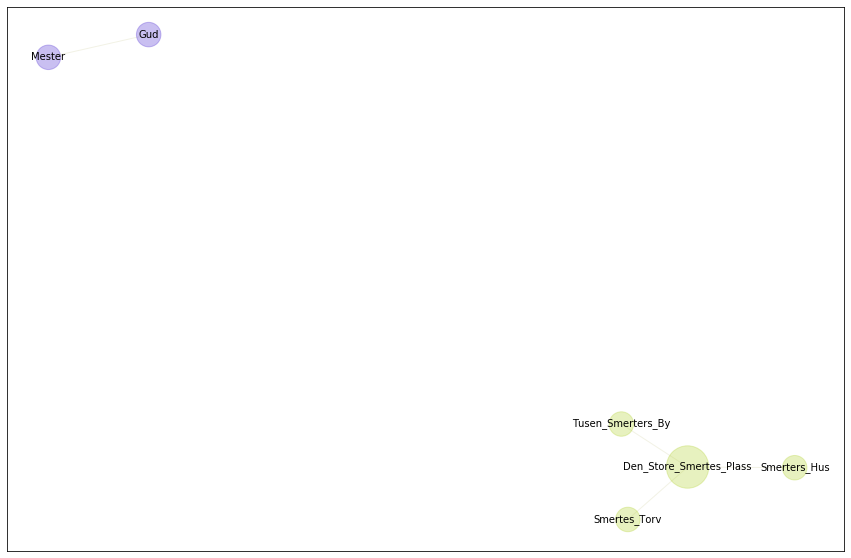

In [46]:
gnl.show_graph(N)

In [47]:
!pip install multiprocess

  Created wheel for multiprocess: filename=multiprocess-0.70.9-cp37-none-any.whl size=108035 sha256=bfdd2d5f85255e6789eb0a02c1373e0ff1aed53776dbfbc2f350288113dff6b4
  Stored in directory: C:\Users\larsj\AppData\Local\pip\Cache\wheels\96\20\ac\9f1d164f7d81787cd6f4401b1d05212807d021fbbbcc301b82
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78598 sha256=7e992180ad709576b4df425c550bd86ca71e2481413d8c2b6ad967b4b3fb8a76
  Stored in directory: C:\Users\larsj\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
Successfully built multiprocess dill


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [54]:
pool.close()

In [65]:

urns = nb.book_urn(author='hams%', limit = 300)
l = len(urns)
ranges = range(0, l, int(l/poolnum))
for i in ranges:
    print(i)

0
75
150
225


In [73]:
def urn_concordance(urns = None, word = None, size = 5, before = None, after = None ):
    """ Find a concordance within a corpus as list of URNs. This is a wrapper for get_urnkonk """
    
    # exit if list of urns is empty
    if urns is None or word is None:
        return []
    
    # The URNs may be presented in different ways. 
    urns = pure_urn(urns)
    
    # find values and feed everything to get_urnkonk
    frame = inspect.currentframe()
    args, _, _, values = inspect.getargvalues(frame)
    query = {i:values[i] for i in args if values[i] != None and i != 'word'}
    return get_urnkonk(word, query)

def get_urnkonk(word, params=None, html=True):
    if params is None:
        params = {}

    para = params
    para['word']= word
    try:
        para['urns'] = pure_urn(para['urns'])
    except:
        print('Parameter urns missing')
    r = requests.post('https://api.nb.no/ngram/urnkonk', json = para)
    if html:
        rows = ""
        for x in r.json():
            rows += """<tr>
                <td>
                    <a href='{urn}?searchText={kw}' target='_blank' style='text-decoration:none'>{urnredux}</a>
                </td>
                <td>{b}</td>
                <td>{w}</td>
                <td style='text-align:left'>{a}</td>
            </tr>\n""".format(kw=word,
                              urn=x['urn'],
                              urnredux="{t}, {f}, {y}".format(t=x['title'], f=x['author'], y=x['year']),
                              b=x['before'],
                              w=x['word'],
                              a=x['after']
                             )
        res = """<table>{rows}</table>""".format(rows=rows)
        res = HTML(res)
    else:
        res = pd.DataFrame(r.json())
        res = res[['urn','before','word','after']]
        #r = r.style.set_properties(subset=['after'],**{'text-align':'left'})
    return res

In [70]:
nb.get_urnkonk??

In [74]:
from multiprocess import Pool
import psutil
import time

urns = nb.book_urn(author='hams%', limit = 300)
l = len(urns)

poolnum = psutil.cpu_count(logical =False)
print(poolnum)
step = int(l/poolnum)
pool = Pool(poolnum)
a = pool.map(lambda x: urn_concordance('krig', urns= urns[x:x+step]), range(0, l, step))

pool.close()

4


NameError: name 'urn_concordance' is not defined

In [60]:
sum(a)

4324